### Урок 3. TensorFlow

1.Попробуйте улучшить работу нейронной сети (разобранную на уроке), обучавшейся на датасет Fashion-MNIST. Напишите в комментариях к уроку, какого результата вы добились от нейросети и что помогло улучшить её точность
2.Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow, неразобранные на уроке
3.* Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews.
Напишите в комментариях к уроку, какого результата вы добились от нейросети и что
помогло улучшить её точность

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Sequential, Model

%matplotlib inline

In [2]:
tf.random.set_seed(1)

In [3]:
tf.config.list_physical_devices('GPU')

[]

#### Импортируем Fashion MNIST датасет

In [4]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize.
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [5]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()
print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


Label is 0


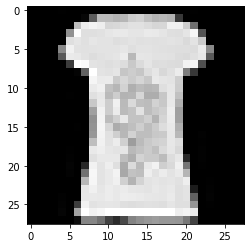

In [6]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Label is {y_train_labels[ind]}')

Дано: коллекция из 60 000 полутоновых изображений 28х28 серого цвета. Всего 10 категорий (кластеров) товаров, а также тестовыйая колекция из 10 000 изображений.<br>
Классовые метки:<br>
   * 0 - футболка<br>
   * 1 - Брюки<br>
   * 2 - Пуловер<br>
   * 3 - Платье<br>
   * 4 - Пальто<br>
   * 5 - Сандалия<br>
   * 6 - Рубашка<br>
   * 7 - Кроссовок<br>
   * 8 - Сумка<br>
   * 9 - Ботинок

#### Анализ датасета
Давайте посмотрим структуры полученного массива данных:

In [7]:
train_images.shape

(60000, 784)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#### Тестовая выборка

In [10]:
test_images.shape

(10000, 784)

In [11]:
len(test_labels)

10000

Конвертируем значения пикселей из вида от 0 до 255 в набор значений от 0 до 1.

In [12]:
X_train.min(), X_train.max()

(0, 255)

In [13]:
# Нормирование данных

X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [14]:
# Вытягивание признаков в массив одномерных векторов
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

#### Определение слоев
Давайте создадим 3 слоя нейронной сети с помощью функционала Keras.layers

In [15]:
model = Sequential([
    #keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(128, activation='relu', name='hiden_one'),
    keras.layers.Dense(64, activation='tanh', name='hiden_two'),
    keras.layers.Dense(10, name='output')
])

In [16]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#### Тренировка модели


In [17]:
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4709 - accuracy: 0.8291
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3550 - accuracy: 0.8703
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3254 - accuracy: 0.8802


In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3491 - accuracy: 0.8736 - 842ms/epoch - 3ms/step

Test accuracy: 0.8736000061035156


Итак, в данной конфигурации модели мы получаем на train точность 0.88, на test: 0.87, что в принципе преемлемый результат.
Однако попробуем переписать и улучшить нашу модель.

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiden_one (Dense)           (None, 128)               100480    
                                                                 
 hiden_two (Dense)           (None, 64)                8256      
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [20]:
%%time
model = Sequential([
    #keras.layers.Flatten(input_shape=(28, 28), name='input'),
    Dense(128, activation='relu', name='hiden_one'),
    Dense(128, activation='relu', name='hiden_two'),
    Dense(128, activation='relu', name='hiden_three'),
    Dense(128, activation='relu', name='hiden_four'),
    Dense(128, activation='relu', name='hiden_five'),
    Dense(10, name='output')
])



CPU times: total: 46.9 ms
Wall time: 18.1 ms


In [21]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5088 - accuracy: 0.8148
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3766 - accuracy: 0.8616
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3480 - accuracy: 0.8729
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3253 - accuracy: 0.8801
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3053 - accuracy: 0.8867
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2909 - accuracy: 0.8913
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2829 - accuracy: 0.8948
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2705 - accuracy: 0.8996
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2591 - accuracy: 0.9034
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.251

In [22]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3507 - accuracy: 0.8764 - 892ms/epoch - 3ms/step

Test accuracy: 0.8763999938964844


In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiden_one (Dense)           (None, 128)               100480    
                                                                 
 hiden_two (Dense)           (None, 128)               16512     
                                                                 
 hiden_three (Dense)         (None, 128)               16512     
                                                                 
 hiden_four (Dense)          (None, 128)               16512     
                                                                 
 hiden_five (Dense)          (None, 128)               16512     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 167,818
Trainable params: 167,818
Non-tr

#### Предсказания нейросети

### Выводы
1. Лучшее качество получилось на максимальном количестве слоев (5) и максимальном количестве нейронов (128). 
2. Лучшая точностть получилась с оптимизатором Adam.

Лушее качество получилось при [5,	128, relu,	Adam]: <br>
То есть получили высокую точность, но довольно большое переобучение.<br>
Получим предсказания модели для обех выборок:

In [24]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [25]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [26]:
predictions[0]

array([3.7639739e-11, 7.3352786e-09, 2.4162705e-10, 1.4459119e-10,
       6.5160544e-11, 1.0163362e-04, 3.7032908e-09, 4.1793538e-03,
       7.0541613e-09, 9.9571902e-01], dtype=float32)

1/1 [==============================] - 0s 28ms/step


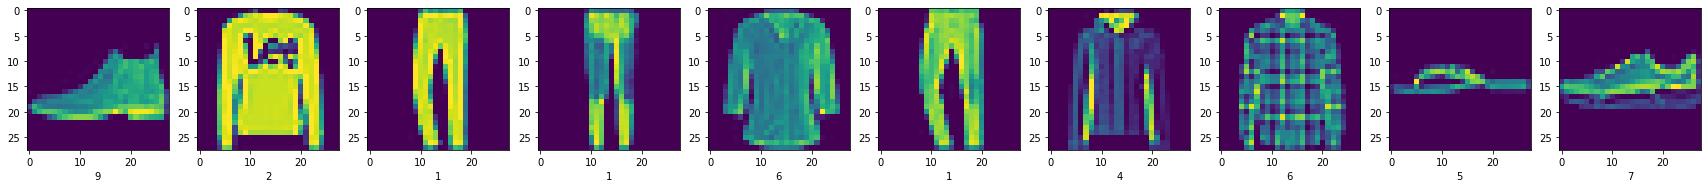

In [27]:
N = 10
y_pred = probability_model.predict(X_test[:N, :])
y_pred_class = np.argmax(y_pred, axis=1)
plt.figure(figsize=(3 * N, 5))

for i in range(N):
  plt.subplot(1, N, i+1)
  plt.imshow(X_test[i,:].reshape(28, 28))
  #plt.xlabel(str(y_pred_class[i]))
  plt.xlabel(str(y_test_labels[i]))
plt.show() 

In [28]:
y_pred_class

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)